# Microsoft Movie Needs Analysis

**Authors:** Lorela Blaka, Eric Denbin, Jesse Markowitz

## Overview

Microsoft bleep blop bloop

### Business Problem

Microsoft blah blah blah...

## Data Understanding

We used "The Numbers" and IMDB as our 2 data sources. "The Numbers" is a movie blog focused on data. It has publicly available datasets containing historical financial information from the first movies dating back to 1915 - present. IMDB has several datasets available of movie details, we focused on  such as cast, crew, runtime, genre, and ratings.

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt

### Analyzing financial data from The Numbers
This data set details production budget, as well as domestic and worldwide gross revenue. It also specifies the exact release date for each movie.

In [2]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Data Cleaning and Feature Engineering 

The dates are `strings`, so we add `'release_year'`and `'month'` columns with the year as `int` type and month as `datetime` type. We also drop `'id'` as it's an extraneous column.

In [3]:
movie_budgets['release_year'] = movie_budgets['release_date'].map(lambda x: int(x[-4:]))
movie_budgets['month'] = movie_budgets['release_date'].map(lambda x: datetime.datetime.strptime(x, "%b %d, %Y").month)
movie_budgets.drop('id', axis=1, inplace=True)

All financial datapoints are also given as `strings` with a \\$ at index 0, so we use a lambda function to convert the financial columns to index the values at 1, convert them to `ints`, remove the commas.  We then engineered profit and ROI, both domestic and worldwide. We calculated ROI as profit divided by production_budget. 

In [4]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].map(lambda x: int(x[1:].replace(",","")))
movie_budgets['production_budget'] = movie_budgets['production_budget'].map(lambda x: int(x[1:].replace(",","")))
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].map(lambda x: int(x[1:].replace(",","")))

In [5]:
movie_budgets["domestic_profit"] = movie_budgets["domestic_gross"] - movie_budgets["production_budget"]
movie_budgets["worldwide_profit"] = movie_budgets["worldwide_gross"] - movie_budgets["production_budget"]

In [6]:
movie_budgets["domestic_roi"] = movie_budgets["domestic_profit"]/movie_budgets['production_budget']
movie_budgets["worldwide_roi"] = movie_budgets["worldwide_profit"]/movie_budgets["production_budget"]

Here is a preview of the movie_budgets dataframe after modifications:

In [7]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,month,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,12,335507625,2351345279,0.789430,5.532577
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,-169536125,635063875,-0.412899,1.546673
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,6,-307237650,-200237650,-0.877822,-0.572108
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,128405868,1072413963,0.388403,3.243841
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,303181382,999721747,0.956408,3.153696


Analyzing percentiles shows just how difficult it can be to make money in this business! Notice that the 50th percentile for both domestic and worldwide ROI are close to 0. And yet, the 25th percentile for budget is \\$5 million.

In [8]:
movie_budgets.describe()

,production_budget,domestic_gross,worldwide_gross,release_year,month,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139,7.050675,1.028557e+07,5.989970e+07,1.983540,3.800161
std,4.181208e+07,6.824060e+07,1.747200e+08,12.724386,3.480147,4.992137e+07,1.460889e+08,26.086591,29.530282
min,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000,1.000000,-3.072376e+08,-2.002376e+08,-1.000000,-1.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000,4.000000,-9.132757e+06,-2.189071e+06,-0.794367,-0.507704
50%,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000,7.000000,-3.487755e+05,8.550286e+06,-0.121674,0.708310
75%,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000,10.000000,1.778144e+07,6.096850e+07,1.058148,2.758346
max,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,12.000000,6.306622e+08,2.351345e+09,1799.000000,1799.000000


### Filtering Relevant Movies and Top Movies

**Fitering Relevant Movies:** 
<br> Our method here was to compare a analyze a slighty filtered subset of `'movies_budget'` which is represented by the `'relevant_movies'` dataframe. There are three filters: Production Budget, Worldwide Gross, and Release Year. Looking at the distribution of Production Budget below, we filtered for greater than $5m, excluding the bottom 25th percentile of movies. We did this to reduce the amount of results that skew the data (value outlined in red). Secondly, we filtered Worldwide Gross revenue to over \\$0 to exclude Netflix movies, which all have no listed revenue. Also lastly, Release Year to remove any data that may have been affected to covid.

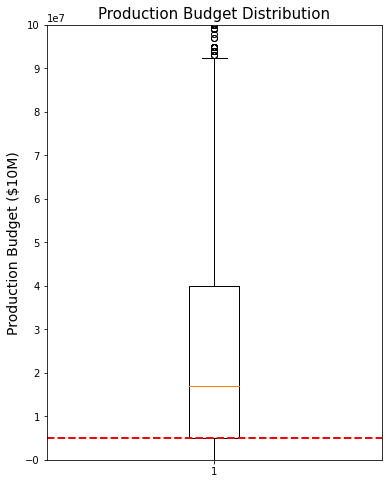

In [9]:
y = movie_budgets['production_budget'].values 
fig, ax2 = plt.subplots(figsize = (6,8))
ax2.boxplot(y)
ax2.set_ylim(-10000,100000000)
ynew = 5000000

ticks = np.arange(-10000,100000000,10000000)
ax2.set_yticks(ticks)
ax2.axhline(ynew , color = 'r', linestyle = "--", linewidth = "2") 

ax2.set_title('Production Budget Distribution', fontsize = 15)


ax2.set_ylabel('Production Budget ($10M)', fontsize = 14);
plt.savefig("production_budget_boxplot.png")

In [10]:
relevant_movies = movie_budgets[(movie_budgets['worldwide_gross'] > 0) 
                                   & (movie_budgets['production_budget'] >= 5000000) 
                                   & (movie_budgets['release_year'] < 2020) ]
relevant_movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,month,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,12,335507625,2351345279,0.789430,5.532577
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,-169536125,635063875,-0.412899,1.546673
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,6,-307237650,-200237650,-0.877822,-0.572108
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,128405868,1072413963,0.388403,3.243841
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,303181382,999721747,0.956408,3.153696


 **Fitering Top Movies:** 
<br> We then create a `'top_movie_budgets'` df based based on further criteria. We decided to use Worldwide and Domestic ROI as metrics for determining top performing movies and analyzed their distirbutions in the 2 boxplots below. We chose ones that fell within the top 25th percentile range (outlined in red).

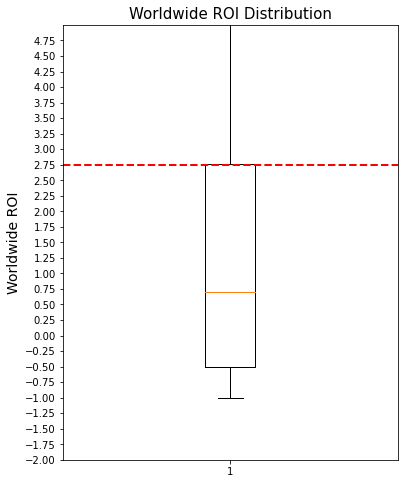

In [11]:
x = movie_budgets['worldwide_roi'].values 
fig, ax = plt.subplots(figsize = (6,8))
ax.boxplot(x)
ax.set_ylim(-2,5)
ynew = 2.75

ticks = np.arange(-2,5,0.25)
ax.set_yticks(ticks)
ax.axhline(ynew , color = 'r', linestyle = "--", linewidth = "2") 
plt.rc('ytick', labelsize=10)
ax.set_title('Worldwide ROI Distribution', fontsize = 15)

ax.set_ylabel('Worldwide ROI', fontsize = 14)

plt.savefig("worldwide_roi_boxplot.png")

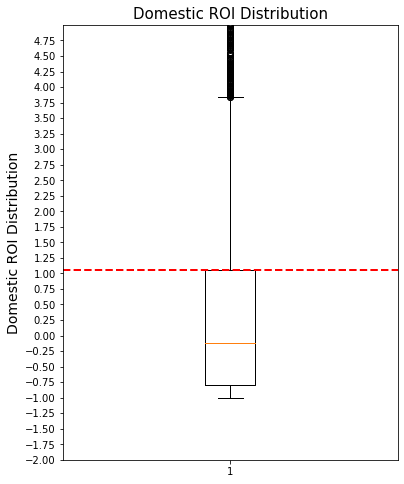

In [12]:
x = movie_budgets['domestic_roi'].values 
fig, ax = plt.subplots(figsize = (6,8))
ax.boxplot(x)
ax.set_ylim(-2,5)
ynew = 1.05

ticks = np.arange(-2,5,0.25)
ax.set_yticks(ticks)
ax.axhline(ynew , color = 'r', linestyle = "--", linewidth = "2") 
plt.rc('ytick', labelsize=10)
ax.set_title('Domestic ROI Distribution', fontsize = 15)

ax.set_ylabel('Domestic ROI Distribution', fontsize = 14)

plt.savefig("domestic_roi_boxplot.png")

In [13]:
top_movie_budgets = movie_budgets[(movie_budgets['worldwide_roi']>=2.75) 
             & (movie_budgets['domestic_roi'] >= 1.05)                 
             & ((movie_budgets['production_budget']>=5000000)
             & (movie_budgets['worldwide_gross']>=0))
             & (movie_budgets['release_year'] < 2020)]

In [14]:
top_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,month,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,12,630662225,1747311220,2.060988,5.710167
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,4,378815482,1748134200,1.262718,5.827114
26,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,5,398279547,1292935897,1.770131,5.746382
33,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,6,437270625,1433854864,2.033817,6.669092
41,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,2,500059566,1148258224,2.500298,5.741291


### ROI and Budget

Going into the analysis of our first recommendation of finding the sweet spot of spending and positive return...
 
We 


In [15]:
relevant_movies.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,month,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,12,335507625,2351345279,0.789430,5.532577
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,-169536125,635063875,-0.412899,1.546673
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,6,-307237650,-200237650,-0.877822,-0.572108


In order to view the relationship between budget and percentage of movies with positive ROI, we create bins for budget. The bins are sized to create bins of equal movie count, not equal budget ranges.

In [16]:
buckets_list = [4999999, 25000000, 50000000, 75000000, 100000000, 200000000, 300000000, 400000000]

The function `bucket_percentages` uses the bucket list to return the percentage of movies in each bin that have a positive ROI.

In [17]:
def bucket_percentages(buckets):
    # relevant_movies_counts = relevant_movies.buckets.value_counts().values
    per_movies_list = []
    
    for i in range(len(buckets)-1):
        num_pos = relevant_movies[(relevant_movies['production_budget'] > buckets[i]) 
                                                        & (relevant_movies['production_budget'] <= buckets[i+1]) 
                                                        & (relevant_movies['worldwide_roi'] > 0)].shape[0]
        total = relevant_movies[(relevant_movies['production_budget'] > buckets[i]) 
                                                        & (relevant_movies['production_budget'] <= buckets[i+1])].shape[0]
        per_movies = (num_pos/total) * 100
        per_movies_list.append(per_movies)
    
    return per_movies_list

We can now visualize the percentage of movies in each budget range that have an ROI greater than 0 (i.e., movies that make money).

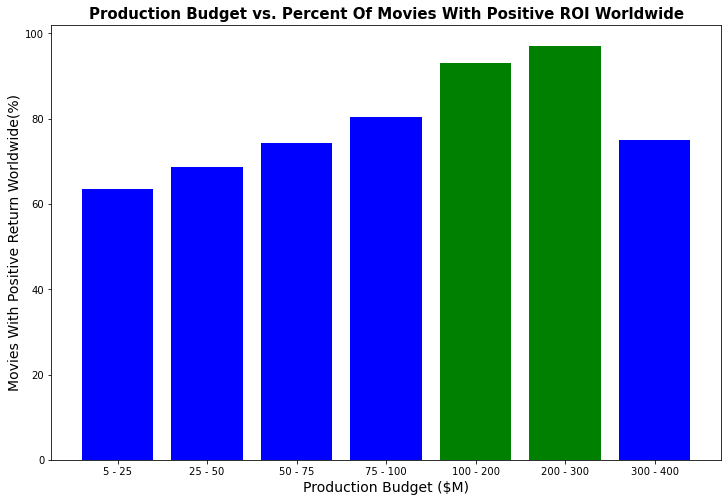

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

x = [('5 - 25'), ('25 - 50'), ('50 - 75'), ('75 - 100'), ('100 - 200'), ('200 - 300'), ('300 - 400')]

h = bucket_percentages(buckets_list)

ax.bar(x, h, color=['blue', 'blue', 'blue', 'blue', 'green', 'green', 'blue']);

ax.set_title('Production Budget vs. Percent Of Movies With Positive ROI Worldwide', 
             {'fontsize':15, 'fontweight':'bold'})
ax.set_xlabel('Production Budget ($M)', fontsize = 14)
ax.set_ylabel('Movies With Positive Return Worldwide(%)', fontsize = 14)

plt.savefig('budget_and_positive_roi.png')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14);

**Interpretation:**
The ideal budget range for a movie is between \\$100million–\\$300million because this range has the highest proportion of movies with ROI above 0. Note the positive relationship between budget and this proportion up until \\$300million, after which there is a point of diminishing returns.

### ROI over time
What are the ROI trends month over month for the top movies compared to relevant movies?

We took relevant_movies top_movie_budgets data 

In [19]:
all_movies_monthly = relevant_movies.groupby('month').mean()
all_movies_monthly.drop({'domestic_gross' 
                       , 'worldwide_gross'
                       , 'domestic_profit'
                       , 'worldwide_profit'}
                      , axis=1, inplace=True)

top_movies_monthly = top_movie_budgets.groupby('month').mean()

top_movies_monthly.drop({ 'domestic_gross' 
                       , 'worldwide_gross'
                       , 'domestic_profit'
                       , 'worldwide_profit'}
                      , axis=1, inplace=True)

merged_monthly_df = all_movies_monthly.merge(top_movies_monthly, on ='month' )

merged_monthly_df.reset_index(inplace= True)


<ipython-input-20-aab50ec1d6ae>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months)


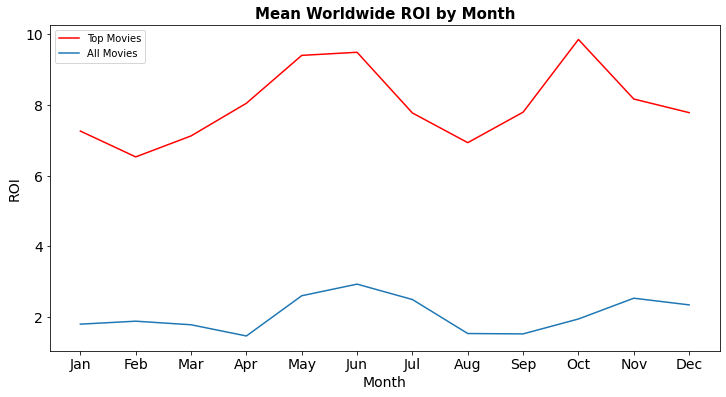

In [20]:
fig, ax = plt.subplots(figsize = (12, 6))
x = merged_monthly_df['month']
y1 = merged_monthly_df['worldwide_roi_x']
y2 = merged_monthly_df['worldwide_roi_y']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
line1, = ax.plot(x, y1)
line2, = ax.plot(x, y2, color='red')
ax.set_title('Mean Worldwide ROI by Month', {'fontsize':15, 'fontweight':'bold'})
ax.set_xlabel('Month', fontsize = 14)
ax.set_xticklabels(months)
ax.set_xticks(list(range(1,13)))
ax.set_ylabel('ROI', fontsize = 14)
ax.legend([line2,line1],['Top Movies','All Movies'], loc='upper left');
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plt.savefig("monthly_roi_graph.png")

### Genre Distributions
We now import and merge IMDB data, which provides genre information for movies released from 2010-2019.

In [21]:
title_basics  = pd.read_csv("unzippedData/imdb.title.basics.csv")
ratings = pd.read_csv('imdb.title.ratings.csv.gz')

Basic cleaning involves renaming columns, converting years from strings to ints, and dropping extraneous columns.

In [22]:
movies_info = title_basics.merge(ratings, how='left', on='tconst')
movies_info.rename({'primary_title' : 'movie', 
                    'start_year' : 'release_year'}, axis =1, inplace= True)
movies_info['release_year'] = movies_info['release_year'].astype(int)
movies_info.head()

,tconst,movie,original_title,release_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


We merge our IMDB data into `'top_movies_df'` in order to begin analyzing genre distributions among successful movies compared to all movies from 2010-2019. There are multiple movies with the same name in the IMDB data that are not present in The Numbers, so we merge by both `'movie'` (name) and `'release_year'`, then check that the `'original_title'` from IMDB is in fact the same name as the movie listed in The Numbers. This returns 155 movies representing the most successful movies from this recent decade.

In [23]:
top_movies_df = top_movie_budgets.merge(movies_info, how='left', on =['movie','release_year'])
top_movies_df = top_movies_df[top_movies_df['movie']== top_movies_df['original_title']]
top_movies_df.drop('original_title', axis=1, inplace=True)
top_movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,month,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,tconst,runtime_minutes,genres,averagerating,numvotes
1,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,4,378815482,1748134200,1.262718,5.827114,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
2,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,5,398279547,1292935897,1.770131,5.746382,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
3,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,6,437270625,1433854864,2.033817,6.669092,tt0369610,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
4,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,2,500059566,1148258224,2.500298,5.741291,tt1825683,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0
6,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,2018,6,408581744,1042520711,2.042909,5.212604,tt3606756,118.0,"Action,Adventure,Animation",7.7,203510.0


In [24]:
top_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 780
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       240 non-null    object 
 1   movie              240 non-null    object 
 2   production_budget  240 non-null    int64  
 3   domestic_gross     240 non-null    int64  
 4   worldwide_gross    240 non-null    int64  
 5   release_year       240 non-null    int64  
 6   month              240 non-null    int64  
 7   domestic_profit    240 non-null    int64  
 8   worldwide_profit   240 non-null    int64  
 9   domestic_roi       240 non-null    float64
 10  worldwide_roi      240 non-null    float64
 11  tconst             240 non-null    object 
 12  runtime_minutes    240 non-null    float64
 13  genres             240 non-null    object 
 14  averagerating      238 non-null    float64
 15  numvotes           238 non-null    float64
dtypes: float64(5), int64(7), o

In [25]:
top_movies_df_columns = list(top_movies_df.columns)
top_movies_df_columns.remove('genres')
top_movies_df_columns

['release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'release_year',
 'month',
 'domestic_profit',
 'worldwide_profit',
 'domestic_roi',
 'worldwide_roi',
 'tconst',
 'runtime_minutes',
 'averagerating',
 'numvotes']

In [26]:
top_movies_df.dropna(subset=['genres'], inplace=True)
top_movies_df['genres'] = top_movies_df['genres'].map(lambda x: x.split(","))

top_movies_df = top_movies_df.genres.apply(pd.Series) \
    .merge(top_movies_df, right_index = True, left_index = True) \
    .drop(["genres"], axis = 1) \
    .melt(id_vars = top_movies_df_columns , value_name = "genres") \
    .dropna()

In [27]:
top_movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,month,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,tconst,runtime_minutes,averagerating,numvotes,variable,genres
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,4,378815482,1748134200,1.262718,5.827114,tt4154756,149.0,8.5,670926.0,0,Action
1,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,5,398279547,1292935897,1.770131,5.746382,tt0848228,143.0,8.1,1183655.0,0,Action
2,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,6,437270625,1433854864,2.033817,6.669092,tt0369610,124.0,7.0,539338.0,0,Action
3,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018,2,500059566,1148258224,2.500298,5.741291,tt1825683,134.0,7.3,516148.0,0,Action
4,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,2018,6,408581744,1042520711,2.042909,5.212604,tt3606756,118.0,7.7,203510.0,0,Action


In [28]:
top_movies_df.genres.value_counts()

Drama          121
Comedy          95
Horror          50
Thriller        48
Adventure       43
Mystery         42
Action          42
Romance         37
Biography       27
Sci-Fi          25
Crime           25
Animation       19
Fantasy         14
Family          13
Music            9
History          6
Sport            4
Musical          2
Documentary      2
War              1
Western          1
Name: genres, dtype: int64

In [29]:
movies_info.head()

,tconst,movie,original_title,release_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [30]:
movies_info.drop(['tconst', 'original_title', 'runtime_minutes', 'averagerating', 'numvotes'], axis=1, inplace=True)

In [31]:
movies_info.head()

,movie,release_year,genres
0,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,"Biography,Drama"
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [32]:
movies_info_columns = list(movies_info.columns)
movies_info_columns.remove('genres')
movies_info_columns

movies_info.dropna(subset=['genres'], inplace=True)
movies_info['genres'] = movies_info['genres'].map(lambda x: x.split(","))

movies_info = movies_info.genres.apply(pd.Series) \
    .merge(movies_info, right_index = True, left_index = True) \
    .drop(["genres"], axis = 1) \
    .melt(id_vars = movies_info_columns , value_name = "genres") \
    .dropna()

In [33]:
movies_info.head()

,movie,release_year,variable,genres
0,Sunghursh,2013,0,Action
1,One Day Before the Rainy Season,2019,0,Biography
2,The Other Side of the Wind,2018,0,Drama
3,Sabse Bada Sukh,2018,0,Comedy
4,The Wandering Soap Opera,2017,0,Comedy


In [34]:
movies_info.genres.value_counts()

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
Name: genres, dtype: int64

In [35]:
all_genres_df = movies_info.groupby('genres')['genres'].count()
all_genres_df = pd.Series.to_frame(all_genres_df) 
all_genres_df.rename(columns={'genres': 'count_all'}, inplace=True)
all_genres_df.reset_index(inplace=True)
all_genres_df.head()

,genres,count_all
0,Action,10335
1,Adult,25
2,Adventure,6465
3,Animation,2799
4,Biography,8722


In [36]:
top_genres_df = top_movies_df.groupby('genres')['genres'].count()
top_genres_df = pd.Series.to_frame(top_genres_df)
top_genres_df.rename(columns={'genres': 'count_top'}, inplace=True)
top_genres_df.reset_index(inplace=True)
top_genres_df.head()

,genres,count_top
0,Action,42
1,Adventure,43
2,Animation,19
3,Biography,27
4,Comedy,95


In [37]:
compare_genres_df = top_genres_df.merge(all_genres_df, how='left')
compare_genres_df

,genres,count_top,count_all
0,Action,42,10335
1,Adventure,43,6465
2,Animation,19,2799
3,Biography,27,8722
4,Comedy,95,25312
5,Crime,25,6753
6,Documentary,2,51640
7,Drama,121,49883
8,Family,13,6227
9,Fantasy,14,3516


In [38]:
count_top_sum = compare_genres_df.count_top.sum()
count_all_sum = compare_genres_df.count_all.sum()
compare_genres_df['percentage_top'] = compare_genres_df['count_top'].map(lambda x: 100*(x/count_top_sum))
compare_genres_df['percentage_all'] = compare_genres_df['count_all'].map(lambda x: 100*(x/count_all_sum))

compare_genres_df.head()

,genres,count_top,count_all,percentage_top,percentage_all
0,Action,42,10335,6.709265,4.536655
1,Adventure,43,6465,6.869010,2.837879
2,Animation,19,2799,3.035144,1.228650
3,Biography,27,8722,4.313099,3.828612
4,Comedy,95,25312,15.175719,11.110965


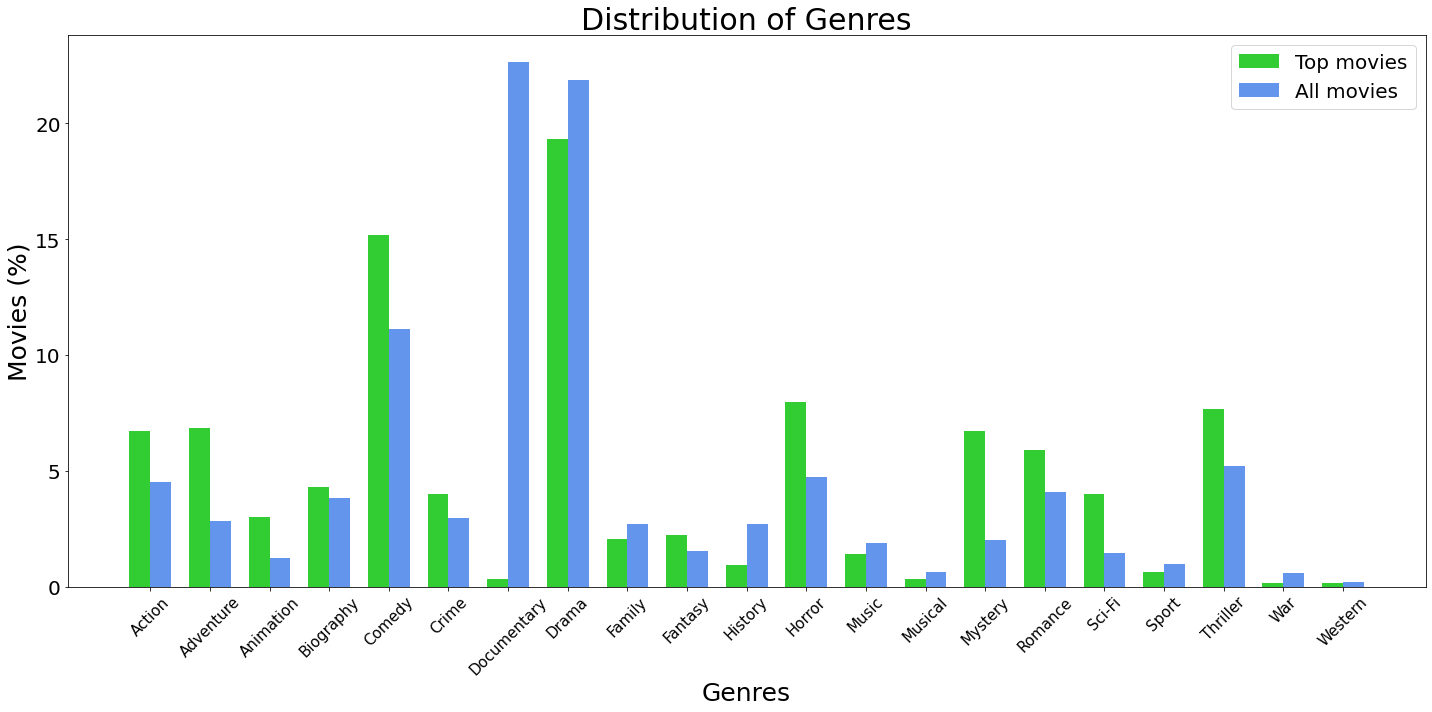

In [39]:
import matplotlib.pyplot as plt
import numpy as np

xlabels = list(compare_genres_df['genres'])
top_genre_percentages = list(compare_genres_df['percentage_top'])
all_genre_percentages = list(compare_genres_df['percentage_all'])

x = np.arange(len(xlabels))
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x - width/2, top_genre_percentages, width, label='Top movies', color='limegreen')
ax.bar(x + width/2, all_genre_percentages, width, label='All movies', color='cornflowerblue')

ax.set_title('Distribution of Genres', size=30)
ax.set_ylabel('Movies (%)', size=25)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticks(x)
ax.set_xticklabels(xlabels, size=15, rotation=45)
ax.set_xlabel('Genres', size=25)
ax.legend(fontsize=20)

fig.tight_layout()

plt.savefig('./distribution_of_genres.png')
plt.show()